# The We Rate Dogs Twitter Archive - Act Report

The WeRateDogs Enhanced Twitter archive contains data extracted from over 5000 + tweets from the dogRate twitter account. This data consist of dog ratings that were taken from the text of the tweet along with the dog stage if present.

The retweet count and favourite count for each tweet were not included in the archieve so i had to download it from the twitter account using the tweet ID from the archive.

Project Steps Overview The tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

Along with the Twitter data, i also downloaded an image predictions file from Udacity servers

The goal of this project is to wrangle the data, gather, assess, clean and tidy the dataset in other to provide meaningful and intelligent analyses and visualizations.

Before i could begin the analysis, the data had to be wrangled into shape to make it easier. I assessed the data both visually and programmatically for quality and tidiness isssues.

The quality of a data is determined mainly by looking at several aspects or dimensions to ensure that it is complete, valid, accurate and consistent.

OBSERVATIONS
QUALITY
Twitter Archieve
Retweeted columns are not needed

in_reply_to_status_id and the in_reply_to_user_id not needed

Timestamp column needs to be a datetime variable

There are only 4 types of values in the source column, and they can be simplified by using the display string portion just before the final "<\a>":

Twitter for iPhone
Vine - Make a Scene
Twitter Web Client
TweetDeck
Tweets with missing data in expanded_urls (links to the tweet).

The rating denominator needs to be fixed

the rating numerator needs to be fixed

Image Prediction
There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".
Tweet JSON File
Set the tweet _id to string with astype()
TIDINESS
The Key Points indicates that we’re only interested in “original tweets”, no “retweets”; this data is stored in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
Reply tweets are also not “original tweets” either; this data is stored in the columns in_reply_to_status_id, in_reply_to_user_id.
There are 4 columns for dog stages (doggo, floofer, pupper, puppo). The 4 columns for one variable doesn't conform to the rules of "tidy data".
Image Prediction
The dog breed prediction and associated confidence level can be combined with the archive table; these will provide additional data about the dog in the tweet based on the tweet's image.
Tweet JSON
Renaming the column names. This will be of help when we wish to merge the data
Change tweet_id from number to string for all data set. This will help when we will be merging the data. For consistency

Here i am going to be inspecting the dataset for two things:

Data quality issues (i.e. content issues)
Lack of tidiness (i.e. Structural issues)

After cleaning many of the issues there were about 2040 tweets with goood qualiity data.

I Created two new columns; breed and confidence: checked each dog breed in order (p1_dog, p2_dog, p3_dog), and picked the breed with the highest confidence level to be copied into the breed column. 
I Copied the associated confidence level into the new confidence column. 
For cases where all 3 prediction flags are False (NOT a valid dog breed), set breed as 'none' and confidence to 0.
This new columns helped my analysis

The new breed and confidence columns were merged into the twitter archive table, using an 'inner' join so that we are left with only tweets with images. 

I renamed most of the columns to make merging possible

## Insights

- The distribution of ratings is very skewed to the left. From the descriptive statistics above we see that 75% of all ratings are between 10 and 14 inclusive (the IQR is from 10 to 12).

- Most common dog stage

    - pupper      209
    - doggo        67
    - puppo        23
    - floofer       7

- Top 10 most common breed 

Top 10 Breed and number of tweets

    - golden_retriever      164
    - Labrador_retriever    109
    - Chihuahua              95
    - Pembroke               95
    - pug                    65
    - toy_poodle             52
    - chow                   50
    - Samoyed                46
    - Pomeranian             41
    - cocker_spaniel         34

The most common dog that is tweeted about, with more than 160 tweets, is the Golden Retriever. Labrador Retrievers, Pembrokes and Chihuahuas are fairly close together in 2nd, 3rd, and 4th place.

There is a strong relationship between favourite count and retweet;
Ploting the two against each other shows a high correlation by the very tight collection of point along the angled straight line.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfwrangled = pd.read_csv('twitter_archieve_master.csv')

Text(0.5, 1.0, 'Retweets and Favorites Plot')

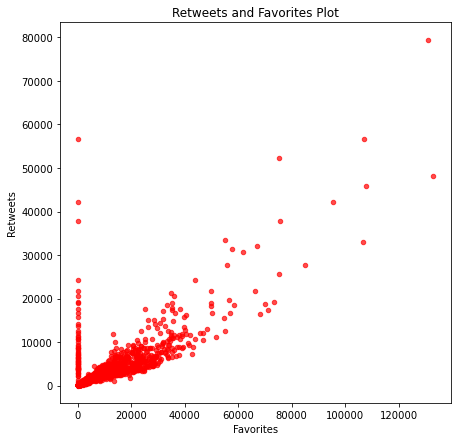

In [3]:
dfwrangled.plot(kind = "scatter", x = "likes", y = "retweets", alpha = 0.7, figsize = (7,7), color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and Favorites Plot')

- Most retweeted tweet till data (Top 5)